#### <h1> FASHION MNIST </h1> 

#### To dive into the FashionMNIST dataset, start by exploring both the training and test datasets with a particular focus on normalization for consistency and compatibility across models. This includes downloading the training and testing sets from the source, then parsing them into respective variables: x_train, y_train, x_test, and y_test.

#### For a closer look, we examine a few sample images from the training set, giving a visual glimpse into the dataset.

In [35]:
import mnist_reader
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from skimage import filters
from skimage.filters import sobel
import numpy as np
import cv2

#### Load/download and normalize the FashionMNIST training and test datasets:

https://github.com/zalandoresearch/fashion-mnist#usage

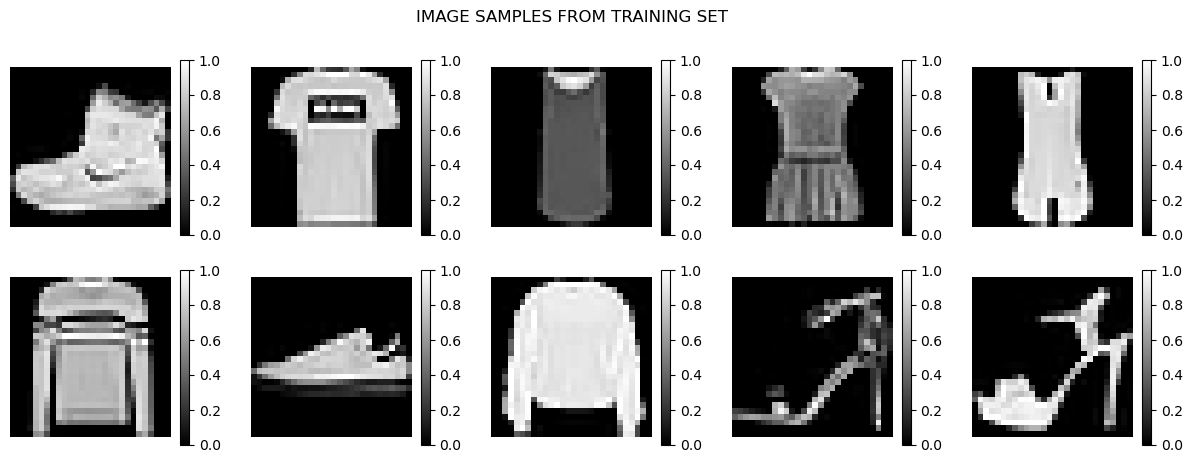

In [36]:
# Loading Fashion-MNIST dataset using mnist reader. 
x_train, y_train = mnist_reader.load_mnist('Fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('Fashion', kind='t10k')

# Normalize pixel values to range [0, 1]. Made use of Min-Max normalisation.
x_train_normalised = x_train/ 255.0
x_test_normalised = x_test/ 255.0

# Display some training images.
plt.figure(figsize=(15, 5))
plt.suptitle('IMAGE SAMPLES FROM TRAINING SET')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_normalised[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.colorbar()
plt.show()


#### Here's a visualization showcasing five images from the training set displayed in a row. Each image has its corresponding category name displayed as a title above it. 

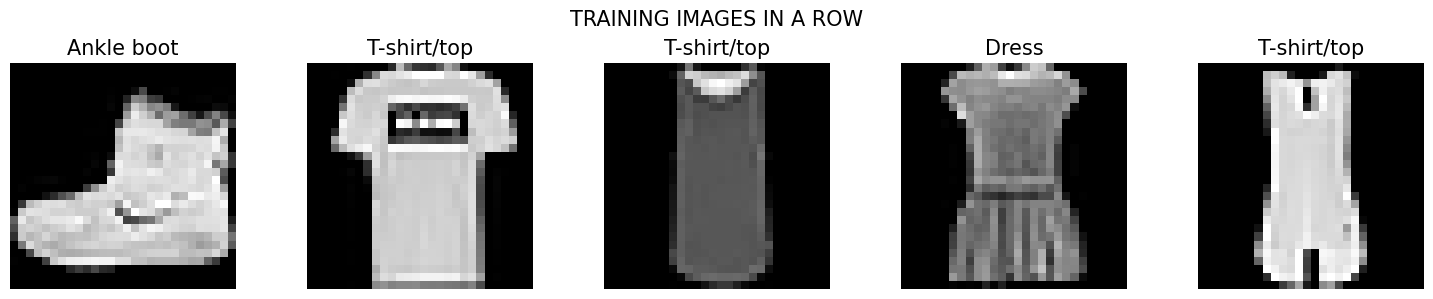

In [37]:
label_names = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal',
               6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot' }
plt.figure(figsize=(15, 3))
plt.suptitle('TRAINING IMAGES IN A ROW', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_normalised[i].reshape(28, 28), cmap='gray')
    plt.title(label_names[y_train[i]], fontsize=15) 
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Using a support vector classifier (SVC) with a linear kernel and a regularization parameter of 0.025, we’ll train a model on the available training data. Since, the processing time exceeds a reasonable duration, we’ll use a subset of 10,000 samples to expedite training. Once the classifier is trained, it will be applied to the test set to predict category labels. To illustrate the classifier's performance, we’ll display five examples from the test set, each labeled with the predicted category followed by the ground-truth category, e.g., "Shirt (Shirt)." 

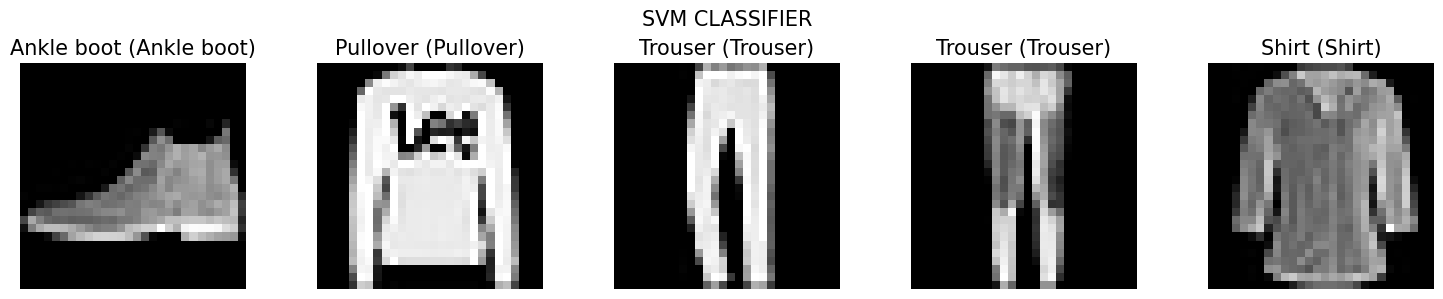

Accuracy of SVM classifier : 83.87%


In [38]:
x_train_normalised = x_train_normalised[:10000]
y_train = y_train[:10000]
svc = SVC(kernel='linear', C=0.025)
svc.fit(x_train_normalised, y_train)
y_pred_svm = svc.predict(x_test_normalised)
y_test_svm = y_test
plt.figure(figsize=(15, 3))
plt.suptitle('SVM CLASSIFIER', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_normalised[i].reshape(28, 28), cmap='gray')
    plt.title(f'{label_names[y_pred_svm[i]]} ({label_names[y_test_svm[i]]})', fontsize=15)
    plt.axis('off')
plt.tight_layout()
plt.show()
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy of SVM classifier : {accuracy * 100:.2f}%")

#### We’ll now apply a neural network using an MLP classifier to perform the classification task. The model will be trained with a maximum of 1,000 iterations and an L2 penalty of 1. Initially, we’ll use the first 10,000 samples from the training set to build the model, then scale up to the full training set to observe the impact on performance.

#### After training, we’ll use this classifier to predict categories on the test set. To assess its effectiveness, we’ll display five test examples, each labeled with the predicted and ground-truth categories, as in "Shirt (Shirt)." Additionally, we’ll print a classification report for this neural network model, detailing key performance metrics.

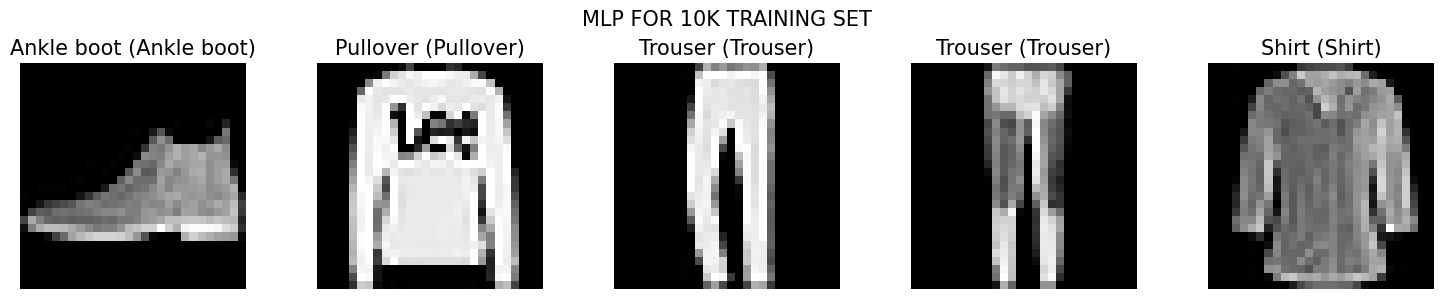

Classification Report for MLP (10k samples):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.81      0.68      0.74      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.71      0.82      0.76      1000
      Sandal       0.95      0.88      0.91      1000
       Shirt       0.67      0.57      0.61      1000
     Sneaker       0.87      0.95      0.91      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.94      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Classification Report (SVM 10k samples):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.99      0.95      0.97   

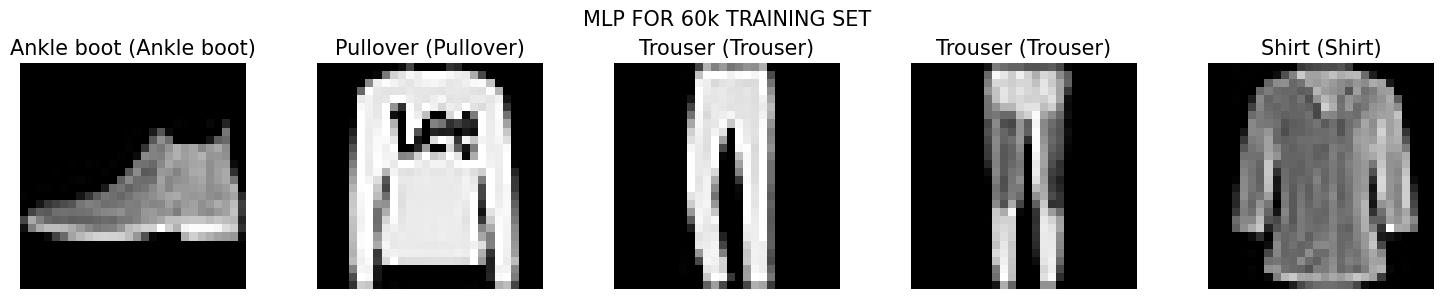

Classification Report (full training set):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.81      0.68      0.74      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.71      0.82      0.76      1000
      Sandal       0.95      0.88      0.91      1000
       Shirt       0.67      0.57      0.61      1000
     Sneaker       0.87      0.95      0.91      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.94      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy of MLP classifier ON 10k SET : 84.71%
Accuracy of MLP classifier ON 60k SET : 84.71%


In [39]:
mlp_10k = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp_full = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp_10k.fit(x_train_normalised[:10000], y_train[:10000])
y_pred_10k = mlp_10k.predict(x_test_normalised)
plt.figure(figsize=(15, 3))
plt.suptitle('MLP FOR 10K TRAINING SET', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_normalised[i].reshape(28,28), cmap='gray')
    plt.title(f"{label_names[y_pred_10k[i]]} ({label_names[y_test[i]]})", fontsize=15)
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Classification Report for MLP (10k samples):")
print(classification_report(y_test, y_pred_10k, target_names=list(label_names.values())))
print("Classification Report (SVM 10k samples):")
print(classification_report(y_test_svm, y_pred_svm, target_names=list(label_names.values())))
mlp_full.fit(x_train_normalised, y_train)
y_pred_full = mlp_full.predict(x_test_normalised)
plt.figure(figsize=(15, 3))
plt.suptitle('MLP FOR 60k TRAINING SET', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_normalised[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"{label_names[y_pred_full[i]]} ({label_names[y_test[i]]})", fontsize=15)
plt.tight_layout()    
plt.show()
print("Classification Report (full training set):")
print(classification_report(y_test, y_pred_full, target_names=list(label_names.values())))
accuracy_mlp_10k = accuracy_score(y_test, y_pred_10k)
print(f"Accuracy of MLP classifier ON 10k SET : {accuracy_mlp_10k * 100:.2f}%")
accuracy_mlp_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy of MLP classifier ON 60k SET : {accuracy_mlp_full * 100:.2f}%")

#### To evaluate the effects of different image preprocessing techniques on classification, we’ll perform the following steps:

#### 1. Edge Detection with Sobel Filter: Apply a Sobel edge detector to both the training and test images, enhancing edge features. Using the transformed (edge-detected) images, we’ll train the same MLP classifier as previously used, with the entire modified training set. Predictions will be shown for five test samples, each labeled with "prediction (ground-truth label)," and we’ll display the primary classification metrics to gauge model performance.

#### 2. Bilateral Filtering: Using a bilateral filter (with neighborhood diameter 9, color sigma 85, and spatial sigma 85), we’ll preprocess the original images in the training and test sets to reduce noise while preserving edges. The MLP classifier will then be trained on this filtered version of the dataset, with prediction labels displayed on five test samples, and classification metrics will be reported.

#### 3. Comparative Analysis: We’ll compare the classification performance across three setups—original images, edge-detected images, and bilateral-filtered images. This analysis will provide insights into how each preprocessing approach influences model accuracy and classification behavior.

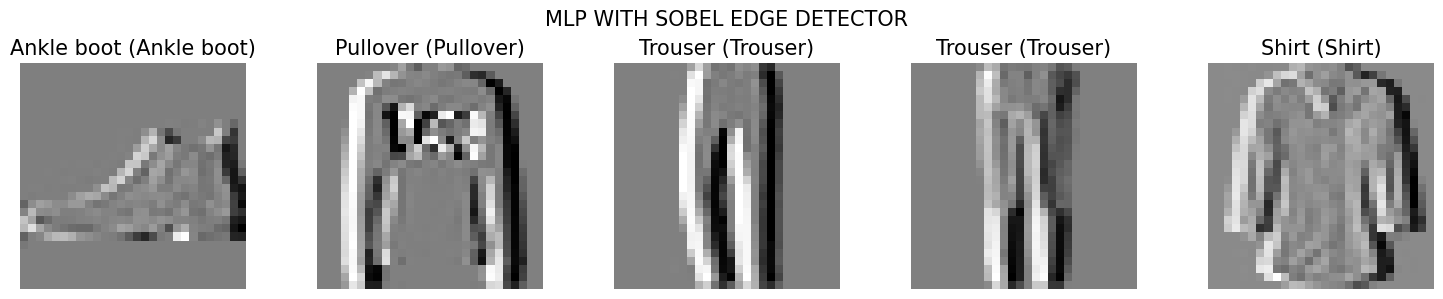

Classification Report (Sobel edge-detected images):
              precision    recall  f1-score   support

 T-shirt/top       0.92      0.93      0.93      1000
     Trouser       0.90      0.94      0.92      1000
    Pullover       0.74      0.80      0.77      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.78      0.75      0.76      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.66      0.56      0.60      1000
     Sneaker       0.90      0.92      0.91      1000
         Bag       0.79      0.83      0.81      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Accuracy of MLP classifier on Sobel edge-detected images: 84.54%


In [40]:
x_train_sobel = np.array([filters.sobel(image) for image in x_train_normalised])
x_test_sobel = np.array([filters.sobel(image) for image in x_test_normalised])
mlp_sobel = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp_sobel.fit(x_train_sobel, y_train)
y_pred_sobel = mlp_sobel.predict(x_test_sobel)
plt.figure(figsize=(15, 3))
plt.suptitle('MLP WITH SOBEL EDGE DETECTOR', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_sobel[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"{label_names[y_pred_sobel[i]]} ({label_names[y_test[i]]})", fontsize=15)
plt.tight_layout()
plt.show()
print("Classification Report (Sobel edge-detected images):")
print(classification_report(y_test_names, y_pred_sobel_names, target_names=list(label_names.values())))
accuracy_sobel = accuracy_score(y_test, y_pred_sobel)
print(f"Accuracy of MLP classifier on Sobel edge-detected images: {accuracy_sobel * 100:.2f}%")

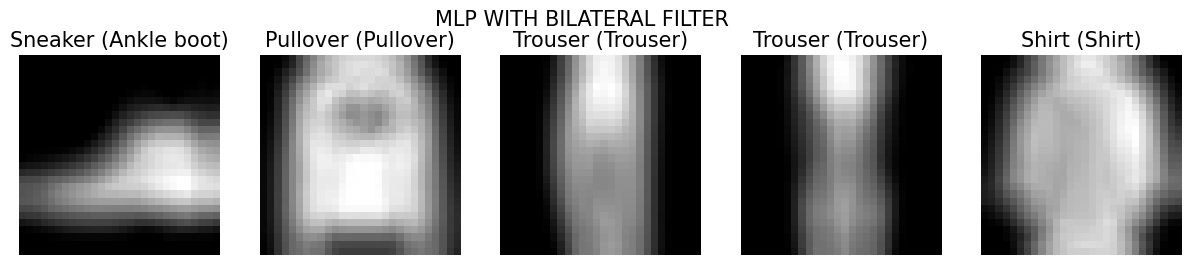

Classification Report for Bilateral Filter:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.78      0.77      1000
     Trouser       0.93      0.92      0.93      1000
    Pullover       0.82      0.46      0.59      1000
       Dress       0.83      0.72      0.77      1000
        Coat       0.66      0.79      0.72      1000
      Sandal       0.89      0.90      0.90      1000
       Shirt       0.43      0.58      0.50      1000
     Sneaker       0.86      0.91      0.89      1000
         Bag       0.94      0.92      0.93      1000
  Ankle boot       0.93      0.89      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000

Accuracy of MLP classifier on bilateral filtered images: 78.86%


In [41]:
def bilateral_filter(img):
    return cv2.bilateralFilter(img.reshape(28, 28).astype(np.float32), 9, 85, 85).flatten()
X_train_bilateral = np.array([bilateral_filter(img) for img in x_train_normalised])
X_test_bilateral = np.array([bilateral_filter(img) for img in x_test_normalised])
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_bilateral, y_train)
y_pred_bilateral = mlp.predict(X_test_bilateral)
plt.figure(figsize=(15, 3))
plt.suptitle('MLP WITH BILATERAL FILTER', fontsize=15)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_bilateral[i].reshape(28, 28), cmap='gray') 
    plt.title(f"{label_names[y_pred_bilateral[i]]} ({label_names[y_test[i]]})", fontsize=15)
    plt.axis('off')
plt.show()
print("Classification Report for Bilateral Filter:")
print(classification_report(y_test, y_pred_bilateral, target_names=list(label_names.values())))
accuracy_bilateral = accuracy_score(y_test, y_pred_bilateral)
print(f"Accuracy of MLP classifier on bilateral filtered images: {accuracy_bilateral * 100:.2f}%")

In [28]:
print('OVERALL COMPARISON:')
print(f"Accuracy of MLP classifier original-image-based classification 10k SET : {accuracy_mlp_10k * 100:.2f}%")
print(f"Accuracy of original-image-based classification 60k SET : {accuracy_mlp_full * 100:.2f}%")
print(f"Accuracy of MLP classifier on edge-based classification: {accuracy_sobel * 100:.2f}%")
print(f"Accuracy of MLP classifier on filtered-image-based classification: {accuracy_bilateral * 100:.2f}%")

OVERALL COMPARISON:
Accuracy of MLP classifier original-image-based classification 10k SET : 84.71%
Accuracy of original-image-based classification 60k SET : 84.71%
Accuracy of MLP classifier on edge-based classification: 84.54%
Accuracy of MLP classifier on filtered-image-based classification: 78.86%
